In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import mpl_toolkits
from datetime import datetime
import seaborn as sn
%matplotlib inline

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df['year'] = df['date'].map(lambda x: x.strftime('%Y'))
df['month'] = df['date'].map(lambda x: x.strftime('%m'))

In [6]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,02
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,05
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,02
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,06
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,01


In [7]:
df = df.dropna()

In [8]:
list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'year',
 'month']

In [9]:
df.view.unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [10]:
df.waterfront.unique()

array([0, 1], dtype=int64)

In [11]:
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [12]:
df.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

In [13]:
df.drop(columns=['id','date','grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15'], inplace=True)

In [14]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,1955,0,98178,47.5112,-122.257,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,1951,1991,98125,47.7210,-122.319,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,1933,0,98028,47.7379,-122.233,2015,02
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,1965,0,98136,47.5208,-122.393,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,1987,0,98074,47.6168,-122.045,2015,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,2009,0,98103,47.6993,-122.346,2014,05
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,2014,0,98146,47.5107,-122.362,2015,02
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,2009,0,98144,47.5944,-122.299,2014,06
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,2004,0,98027,47.5345,-122.069,2015,01


In [15]:
# df_ml = df.drop(columns=['lat','long'])

In [16]:
df.loc[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,year,month
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,1947,0,98103,47.6878,-122.331,2014,06


In [17]:
df.drop(df.index[15870], inplace=True)

In [18]:
df.loc[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,year,month


In [19]:
df_ml = df.copy()

In [20]:
df_ml['yr_renovated'] = df_ml['yr_renovated'].astype(bool).astype(int)
df_ml

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,1955,0,98178,47.5112,-122.257,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,1951,1,98125,47.7210,-122.319,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,1933,0,98028,47.7379,-122.233,2015,02
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,1965,0,98136,47.5208,-122.393,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,1987,0,98074,47.6168,-122.045,2015,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,2009,0,98103,47.6993,-122.346,2014,05
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,2014,0,98146,47.5107,-122.362,2015,02
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,2009,0,98144,47.5944,-122.299,2014,06
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,2004,0,98027,47.5345,-122.069,2015,01


In [33]:
df_ml.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long
count,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,0.007542,0.234314,3.409356,1971.006247,0.042291,98077.938645,47.560047,-122.213891
std,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.086519,0.766334,0.650668,29.373636,0.201258,53.505993,0.138564,0.140829
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,2015.000000,1.000000,98199.000000,47.777600,-121.315000


In [21]:
list(df_ml.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'year',
 'month']

In [22]:
y = df_ml['price']
X = df_ml[['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'yr_renovated',
 'zipcode',
 'year',
 'month'
]]

In [23]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.5763762238264412


In [27]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
bedrooms,-54033.231598
bathrooms,16894.238900
sqft_living,284.440219
sqft_lot,-0.355038
floors,21489.376061
waterfront,501733.214956
view,64876.445721
condition,49714.512249
yr_renovated,124561.972673
zipcode,356.781838


In [28]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state=42)
regressor.fit(X,y)

RandomForestRegressor(random_state=42)

In [29]:
regressor.score(X_test, y_test)

0.9683269750459882

In [42]:
# Use the forest's predict method on the test data
predictions = regressor.predict(X_test)

# Print out the mean absolute error (mae)
from sklearn.metrics import mean_absolute_error

print('Mean Absolute Error:' ,mean_absolute_error(y_test, predictions))

Mean Absolute Error: 33726.91870793541


In [37]:
# The mean absolute percentage error (MAPE) is a statistical measure of how accurate a forecast system is. 
# It measures this accuracy as a percentage, and can be calculated as the average absolute percent error
# for each time period minus actual values divided by actual values.

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
print('MAPE:', mape.mean())

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

MAPE: 6.1069031418561375
Accuracy: 93.89 %.


In [40]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, predictions)

ImportError: cannot import name 'mean_absolute_percentage_error' from 'sklearn.metrics' (C:\Users\ericw\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [35]:
feature_names = X
sorted(zip(regressor.feature_importances_, feature_names), reverse=True)

[(0.5785172276161218, 'sqft_living'),
 (0.2019507661358642, 'zipcode'),
 (0.05914635759567462, 'sqft_lot'),
 (0.03738386699350198, 'view'),
 (0.030658412297266274, 'waterfront'),
 (0.025959018949189755, 'bathrooms'),
 (0.02117223532680088, 'month'),
 (0.013099009414728744, 'bedrooms'),
 (0.011645243241086099, 'condition'),
 (0.011516735321354851, 'floors'),
 (0.0054420531708649035, 'yr_renovated'),
 (0.0035090739375458796, 'year')]

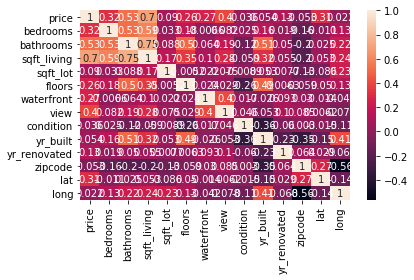

In [32]:
corrMatrix = df_ml.corr()
sn.heatmap(corrMatrix, annot=True)
plt.tight_layout()
plt.show()